In [26]:

%pylab
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage


Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## nichts angewendet auf NIH3T3 Dataset

In [21]:

gt1 = plt.imread(r'data\Otsu_data\NIH3T3\gt\0.png')
gt2 = plt.imread(r'data\Otsu_data\NIH3T3\gt\1.png')
gt3 = plt.imread(r'data\Otsu_data\NIH3T3\gt\26.png')
gt4 = plt.imread(r'data\Otsu_data\NIH3T3\gt\27.png')
gt5 = plt.imread(r'data\Otsu_data\NIH3T3\gt\28.png')
gt6 = plt.imread(r'data\Otsu_data\NIH3T3\gt\29.png')
gt7 = plt.imread(r'data\Otsu_data\NIH3T3\gt\30.png')
gt8 = plt.imread(r'data\Otsu_data\NIH3T3\gt\31.png')
gt9 = plt.imread(r'data\Otsu_data\NIH3T3\gt\32.png')
gt10 = plt.imread(r'data\Otsu_data\NIH3T3\gt\33.png')
gt11 = plt.imread(r'data\Otsu_data\NIH3T3\gt\37.png')
gt12 = plt.imread(r'data\Otsu_data\NIH3T3\gt\40.png')
gt13 = plt.imread(r'data\Otsu_data\NIH3T3\gt\42.png')
gt14 = plt.imread(r'data\Otsu_data\NIH3T3\gt\44.png')
gt15 = plt.imread(r'data\Otsu_data\NIH3T3\gt\45.png')
gt16 = plt.imread(r'data\Otsu_data\NIH3T3\gt\46.png')
gt17 = plt.imread(r'data\Otsu_data\NIH3T3\gt\47.png')
gt18 = plt.imread(r'data\Otsu_data\NIH3T3\gt\49.png')


ground_truth_NIH3T3 = [gt1, gt2, gt3, gt4, gt5, gt6, gt7, gt8, gt9, gt10, gt11, gt12, gt13, gt14, gt15, gt16, gt17 ,gt18]

#import normal images

img1 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-0.png')
img2 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-1.png')
img3 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-26.png')
img4 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-27.png')
img5 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-28.png')
img6 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-29.png')
img7 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-30.png')
img8 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-31.png')
img9 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-32.png')
img10 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-33.png')
img11 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-37.png')
img12 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-40.png')
img13 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-42.png')
img14 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-44.png')
img15 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-45.png')
img16 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-46.png')
img17 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-47.png')
img18 = plt.imread(r'data\Otsu_data\NIH3T3\img\dna-49.png')


img_NIH3T3 = [img1, img2, img3, img4, img5, img6, img7, img8, img9, img10, img11, img12, img13, img14, img15, img16, img17 ,img18]

In [27]:
#otsu code

# otsu thresholding
def otsu_thresholding(img,x):
  
#bins optimieren.... alles zu 0-255 machen


   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins, patches = plt.hist(img.flatten(),log = 'False', bins = x)

   # initialize threshold value (T = 0) 
    thres = 0
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    bcv = list()
    
    # set up initial values
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0

        #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
        for j in range(0,i+1):
            w0_sum += n[j]
            mean_sum0 += bins[j]*n[j]
            
        # background class probabilites and class mean levels
        w0 = w0_sum / sum(n)    
        mean_0 = mean_sum0 / sum(n[0:i+1])
        
        # compute background class variance
        for m in range(0,i+1):
            v0_sum += ((bins[m]-mean_0)** 2) * n[m]
        
        v0 = v0_sum / sum(n[0:i+1])
        
        # sum up the probabilites of each intensity value;  and the mean value
        for k in range(i+1, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += bins[k]*n[k]

        # compute foreground class probabilities and class mean levels    
        w1 = w1_sum / sum(n)
     
        mean_1 = mean_sum1 / sum(n[i+1:len(n)])

        # compute foreground class variance 
        for s in range(i+1,len(n)):
            v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
        
        v1 = v1_sum / sum(n[i+1:len(n)])

        # compute within class variance and append to list
        bclv = (w0 * v0) + (w1 * v1)
        bcv.append(bclv)

    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(bcv)

    #select optimal threshold in the list
    l = 0
    while l < len(bcv):
        if bcv[l] == optimal_thres: thres = bins[l]
        l += 1


    #perform image clipping 
    for o in ndindex(copy.shape):
        if copy[o] < (thres): 
            copy[o] = 0
        else:
            copy[o] = 255

    # output image
    figure()  
    imshow(copy, 'gray')
    colorbar()

    return copy
    





C:\Users\Helen Jade\AppData\Local\Temp\ipykernel_26464\3251053893.py:55: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\Helen Jade\AppData\Local\Temp\ipykernel_26464\3251053893.py:61: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


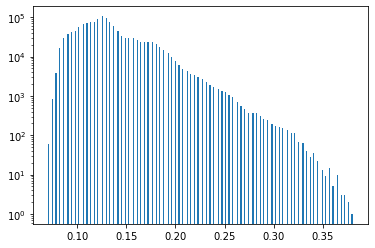

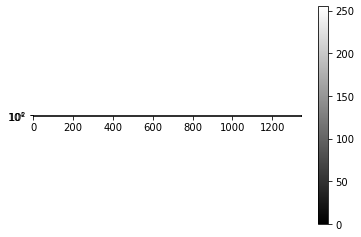

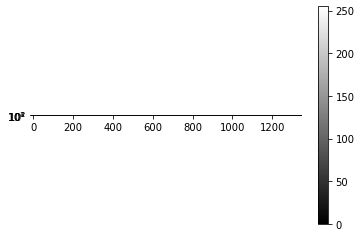

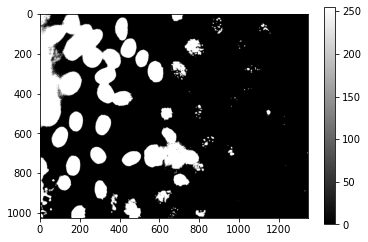

In [42]:
otsu12 = otsu_thresholding(img12,255)

otsu13 = otsu_thresholding(img13,255)

otsu14 = otsu_thresholding(img14,255)

#threshold

# müssen schaffen dass wir alle bilder durchgehen und thresholden und dann in 
#Threshold()   Liste speichern

Irgendwie liste machen???

threshold= list()
for i in range(0,len(img_NIH3T3)):
   threshold.append(img_NIH3T3)

In [44]:
thresholded = (otsu12, otsu13, otsu14)
threshold

(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[255., 255., 255., ...,   0.,   0.,   0.],
        [255., 255., 255., ...,   0.,   0.,   0.],
        [255., 255., 255., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32))

# Dice Score (unprocessed)

In [45]:

#1)brauchen otsu so dass es als liste funktioniert !!!!!!! damit wir alle gethresholdete bilder in threshold[] speichern können
#2) dann brauchen wir dice so (evtl for schleife?) dass es für jedes bild durchgeht und uns wieder Dice scores in einer liste speichert 

#create a list for ground truth images and thresholded images (is done manually before running the dice score algorithm, supports iteration trough a whole dataset, here empty lists included just for the package to function)
ground_truth_NIH3T3 =[]
thresholded=[]


# option 1: positive pixels = background pixels. Used for images with foreground > background
# define the algorithm, x = image coordinate in the ground truth and thresholded lists
def b_dice(x): 

    #pick the ground truth and thresholded pictures from the lists
    gt = ground_truth_NIH3T3 = [11] 
    pt = thresholded[0] 

    #set new variables for count of different pixel types
    tp=0 
    tn=0
    fp=0
    fn=0
    #iterate over all pixel coordinates (gt and pt have the same dimensions)
    for x, y in np.ndindex((gt.shape[0],gt.shape[1])):

        #if a pixel belongs to background in ground truth
        if gt[x,y]==0:
            #if it belongs to background in post-otsu
            if pt[x,y]==0:
                #add it to the true positive variable
                tp+=1
            #count all other pixel kinds
            else:
                fn+=1
        else:
            if pt[x,y]==0:
                fp+=1

                #else: tn+=1 not included, as tn is not needed in calculations
    b_dsc= 2*tp/(2*tp+fn+fp)
    return b_dsc

def f_dice(x): # same thing for positive pixels = foreground pixels
    gt = ground_truth_NIH3T3 = [x] 
    pt = tresholded[x] 
    tp=0
    tn=0
    fp=0
    fn=0
    for x, y in np.ndindex((gt.shape[0],gt.shape[1])):
        if gt[x,y]!=0:
            if pt[x,y]!=0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]!=0:
                fp+=1 
    f_dsc= 2*tp/(2*tp+fn+fp)
    return f_dsc


def dice(x, method):
    if method=='background' or method=='b':
        b_dice(x)
    if method=='foreground' or method == 'f':
        f_dice(x)
    else:
        print('write <foreground> or <f> for forward dsc and <bacground> or <b> for background dsc')




In [32]:
b_dice(otsu_img12)

TypeError: only integer scalar arrays can be converted to a scalar index